Entropy results (in bits):
Fair coin: 1.000
Fair dice: 2.585
Biased dice: 2.161


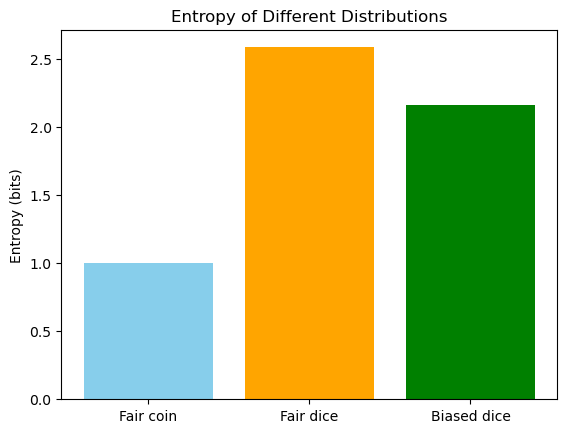


Mutual Information between features and target:
  Feature  Mutual Information
3      X3            0.391607
1      X1            0.022410
0      X0            0.009329
4      X4            0.009181
2      X2            0.000000


In [1]:
# Information Theory Demo: Entropy & Mutual Information
# Author: Xiaowen
# Description: Compute entropy with scipy, mutual information with sklearn,
# and visualize entropy of different probability distributions.

import numpy as np
from scipy.stats import entropy
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

# 1. Entropy Calculation
# Define some probability distributions
p_coin = [0.5, 0.5]        # fair coin
p_dice = [1/6]*6           # fair dice
p_biased_dice = [0.5, 0.1, 0.1, 0.1, 0.1, 0.1]  # biased dice

# Compute entropy (base 2, unit = bits)
entropy_values = {
    "Fair coin": entropy(p_coin, base=2),
    "Fair dice": entropy(p_dice, base=2),
    "Biased dice": entropy(p_biased_dice, base=2)
}

print("Entropy results (in bits):")
for k, v in entropy_values.items():
    print(f"{k}: {v:.3f}")

# Visualization
plt.bar(entropy_values.keys(), entropy_values.values(), color=["skyblue", "orange", "green"])
plt.ylabel("Entropy (bits)")
plt.title("Entropy of Different Distributions")
plt.show()


# 2. Mutual Information
# ======================
# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=500, n_features=5, n_informative=2, 
    n_redundant=0, random_state=42
)

# Compute mutual information between each feature and the target
mi = mutual_info_classif(X, y, random_state=42)

# Display results in a table
df = pd.DataFrame({
    "Feature": [f"X{i}" for i in range(X.shape[1])],
    "Mutual Information": mi
})
print("\nMutual Information between features and target:")
print(df.sort_values("Mutual Information", ascending=False))
